# Block Tri-diagonal Scheme

We will use the Block Tri-diagonal scheme to solve higher order ODE :

$$ y''' + 4y'' + y' - 6y = 1 $$
for the conditions:
$$ y(0) = 0 $$
$$ y'(0) = 0 $$
$$ y'(1) = 0 $$


In [71]:
from __future__ import division
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [np.matrix('0 0; 0 0') for i in range(N)]
    d_ = [np.matrix('0 ; 0') for i in range(N)]
    b_inv = [np.matrix('0 0; 0 0') for i in range(N)]
    f = [np.matrix('0 ; 0') for i in range(N)]
    b_inv[0] = b[0].getI()
    c_[0] = b_inv[0]*c[0]
    d_[0] = b_inv[0]*d[0]

    for i in range(1, N):
        b_inv[i] = (b[i] - a[i]*c_[i-1]).getI()
        c_[i] = b_inv[i]*c[i]
        d_[i] = b_inv[i]*(d[i] - a[i]*d_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f

In [89]:

def solve_BVP(l, r, h):
    
    """
    Read the input file to returns a dict
    The equation is in form: A y" + B y' + C y - D = 0
    and the boundary_conditions are y(l) = y_l and y(r) = y_r

    """

    N = (r - l)/h
    assert int(N) == N
    N = int(N)
    z_l = np.matrix('0; 1')
    z_r = np.matrix('1; 0')
    
    a = [np.matrix('0 0; 0 0') for i in range(N-1)]
    b = [np.matrix('0 0; 0 0') for i in range(N-1)]
    c = [np.matrix('0 0; 0 0') for i in range(N-1)]
    d = [np.matrix('0; 0') for i in range(N-1)]

    for i in range(N-1):
        a[i] = np.matrix('1/(h**2) 0; 1/2 1/h')
        b[i] = np.matrix('(-2/(h**2)-2/h+1) -6; 1/2 -1/h')
        c[i] = np.matrix('1/(h**2)+2/h 0; 0 0')
        d[i] = np.matrix('1; 0')
    d[0] -= a[0]*z_l
    d[N-2] -= c[N-2]*z_r

    f = [z_l] + thomas_algorithm(a, b, c, d) + [z_r]
    return f

In [98]:

def test_BVP(l, r, h):
    
    """
    Read the input file to returns a dict
    The equation is in form: A y" + B y' + C y - D = 0
    and the boundary_conditions are y(l) = y_l and y(r) = y_r

    """

    N = (r - l)/h
    N = int(N)
    z_l = np.matrix('0; 0')
    z_r = np.matrix('1; -1')
    
    a = [np.matrix('0 0; 0 0') for i in range(N-1)]
    b = [np.matrix('0 0; 0 0') for i in range(N-1)]
    c = [np.matrix('0 0; 0 0') for i in range(N-1)]
    d = [np.matrix('0; 0') for i in range(N-1)]

    for i in range(N-1):
        a[i] = np.matrix('(1/(h**2)) 0; (1/2) (1/h)')
        b[i] = np.matrix('(-2/(h**2)+1) 0; (1/2) (-1/h)')
        c[i] = np.matrix('(1/(h**2)) 0; 0 0')
        d[i] = np.matrix('0; 0')
    d[0] -= a[0]*z_l
    d[N-2] -= c[N-2]*z_r

    f = [z_l] + thomas_algorithm(a, b, c, d) + [z_r]
    return f

[matrix([[0],
        [0]]), matrix([[  1.81129926],
        [ 21.73559116]]), matrix([[  3.16977371],
        [ 81.50846686]]), matrix([[   3.73580473],
        [ 164.37540817]]), matrix([[   3.36788457],
        [ 249.61967976]]), matrix([[   2.15799326],
        [ 315.93021374]]), matrix([[   0.40860364],
        [ 346.72937661]]), matrix([[  -1.44293689],
        [ 334.31737765]]), matrix([[  -2.9337432 ],
        [ 281.79721661]]), matrix([[  -3.69111371],
        [ 202.29893374]]), matrix([[  -3.52570579],
        [ 115.69709976]]), matrix([[ -2.47887143],
        [ 43.64217317]]), matrix([[-0.8123192 ],
        [ 4.14788561]]), matrix([[ 1.05731282],
        [ 7.08780898]]), matrix([[  2.66261664],
        [ 51.72696242]]), matrix([[   3.60226629],
        [ 126.90555759]]), matrix([[   3.64134938],
        [ 213.82894569]]), matrix([[   2.77009512],
        [ 290.76627969]]), matrix([[   1.20631708],
        [ 338.48322609]]), matrix([[  -0.65904023],
        [ 345.0505483 ]]),

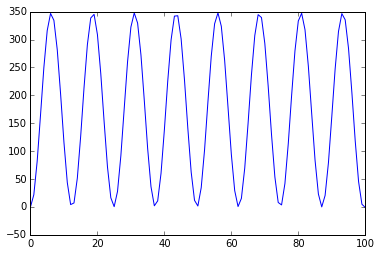

In [100]:
l = 0
r = 1.
h = 0.01
soln = test_BVP(l, r, h)
print soln
X = np.linspace(l, r, (r-l)/h+1)
z, y = [], []
for ans in soln :
    z.append(ans[0,0])
    y.append(ans[1,0])
y = np.array(y)
print X.shape, y.shape
plt.plot(y)

In [103]:
a = np.matrix('2 0; 0 2')
a.getI()

matrix([[ 0.5,  0. ],
        [ 0. ,  0.5]])